In [1]:
from tensorflow.python.client import device_lib

In [2]:
print(device_lib.list_local_devices())

[name: "/device:CPU:0"
device_type: "CPU"
memory_limit: 268435456
locality {
}
incarnation: 5030790075948688690
xla_global_id: -1
]


In [3]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
from bs4 import BeautifulSoup

In [9]:
import requests

In [10]:
response = requests.get("https://news.ycombinator.com/news")

In [15]:
web_page = response.text

In [17]:
soup = BeautifulSoup(web_page, "html.parser")

In [20]:
print(soup.title.getText())

Hacker News


In [23]:
all_anchor_tag = soup.findAll(name="a")

In [34]:
print(soup.prettify())

<html lang="en" op="news">
 <head>
  <meta content="origin" name="referrer"/>
  <meta content="width=device-width, initial-scale=1.0" name="viewport"/>
  <link href="news.css?zGmW40hefAv6yjm5dgNb" rel="stylesheet" type="text/css"/>
  <link href="y18.svg" rel="icon"/>
  <link href="rss" rel="alternate" title="RSS" type="application/rss+xml"/>
  <title>
   Hacker News
  </title>
 </head>
 <body>
  <center>
   <table bgcolor="#f6f6ef" border="0" cellpadding="0" cellspacing="0" id="hnmain" width="85%">
    <tr>
     <td bgcolor="#ff6600">
      <table border="0" cellpadding="0" cellspacing="0" style="padding:2px" width="100%">
       <tr>
        <td style="width:18px;padding-right:4px">
         <a href="https://news.ycombinator.com">
          <img height="18" src="y18.svg" style="border:1px white solid; display:block" width="18"/>
         </a>
        </td>
        <td style="line-height:12pt; height:10px;">
         <span class="pagetop">
          <b class="hnname">
           <a hre

In [43]:
article_text = soup.selectAll(selector='span a')

In [48]:
article_text[9]

<a href="https://app.radicle.xyz/nodes/seed.radicle.garden/rad:z3gqcJUoA1n9HaHKufZs5FCSGazv5">Radicle: Open-Source, Peer-to-Peer, GitHub Alternative</a>

In [51]:
article_link = article_text[9].get("href")

In [52]:
print(article_link)

https://app.radicle.xyz/nodes/seed.radicle.garden/rad:z3gqcJUoA1n9HaHKufZs5FCSGazv5


In [54]:
article_raw_text = article_text[9].getText()

In [56]:
print(article_raw_text)

Radicle: Open-Source, Peer-to-Peer, GitHub Alternative


In [64]:
article_raw_texts = []
article_links = []

for articletext in article_text:
    article_link = articletext.get("href")
    article_links.append(article_link)
    article_raw_text = articletext.getText()
    article_raw_texts.append(article_raw_text)

In [65]:
article_links

['news',
 'newest',
 'front',
 'newcomments',
 'ask',
 'show',
 'jobs',
 'submit',
 'login?goto=news',
 'https://app.radicle.xyz/nodes/seed.radicle.garden/rad:z3gqcJUoA1n9HaHKufZs5FCSGazv5',
 'from?site=radicle.xyz',
 'user?id=aiw1nt3rs',
 'item?id=39600810',
 'hide?id=39600810&goto=news',
 'item?id=39600810',
 'https://shenlanguage.org/',
 'from?site=shenlanguage.org',
 'user?id=tmalsburg2',
 'item?id=39602472',
 'hide?id=39602472&goto=news',
 'item?id=39602472',
 'https://metastatus.com/',
 'from?site=metastatus.com',
 'user?id=dewmal',
 'item?id=39604746',
 'hide?id=39604746&goto=news',
 'item?id=39604746',
 'https://arbital.com/p/likelihoods_not_pvalues/?l=4xx',
 'from?site=arbital.com',
 'user?id=Tomte',
 'item?id=39603518',
 'hide?id=39603518&goto=news',
 'item?id=39603518',
 'https://stability.ai/news/stable-diffusion-3-research-paper',
 'from?site=stability.ai',
 'user?id=ed',
 'item?id=39599958',
 'hide?id=39599958&goto=news',
 'item?id=39599958',
 'https://jasongriffey.net/li

In [66]:
import pandas as pd
import numpy as np

In [68]:
import os

In [73]:
df = pd.read_csv('cardio_base.csv')

In [74]:
df.head()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,18393,2,168,62.0,110,80,1,0
1,1,20228,1,156,85.0,140,90,3,0
2,2,18857,1,165,64.0,130,70,3,0
3,3,17623,2,169,82.0,150,100,1,0
4,4,17474,1,156,56.0,100,60,1,0


In [76]:
age = df['age']

In [85]:
df['age'] = age//365.25

In [105]:
df[['age', 'cholesterol']]

,age,cholesterol
0,50.0,1
1,55.0,3
2,51.0,3
3,48.0,1
4,47.0,1
...,...,...
69995,52.0,1
69996,61.0,2
69997,52.0,3
69998,61.0,1


In [102]:
df[age] > 50

KeyError: "None of [Index([18393, 20228, 18857, 17623, 17474, 21914, 22113, 22584, 17668, 19834,\n       ...\n       15094, 20609, 18792, 19699, 21074, 19240, 22601, 19066, 22431, 20540],\n      dtype='int64', length=70000)] are in the [columns]"

In [108]:
df[df['age'] > 50]

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
1,1,55.0,1,156,85.0,140,90,3,0
2,2,51.0,1,165,64.0,130,70,3,0
5,8,59.0,1,151,67.0,120,80,2,0
6,9,60.0,1,157,93.0,130,80,3,0
7,12,61.0,2,178,95.0,130,90,3,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,168,76.0,120,80,1,1
69996,99995,61.0,1,158,126.0,140,90,2,0
69997,99996,52.0,2,183,105.0,180,90,3,0
69998,99998,61.0,1,163,72.0,135,80,1,0


In [113]:
sum(df['age'] > 50)/sum(df['cholesterol'])

0.4742007295074257

In [114]:
sum(df['age'])/sum(df['cholesterol'])

38.630741735558786

In [115]:
df['gender']

0        2
1        1
2        1
3        2
4        1
        ..
69995    2
69996    1
69997    2
69998    1
69999    1
Name: gender, Length: 70000, dtype: int64

In [116]:
import seaborn as sns

<Axes: xlabel='gender', ylabel='Count'>

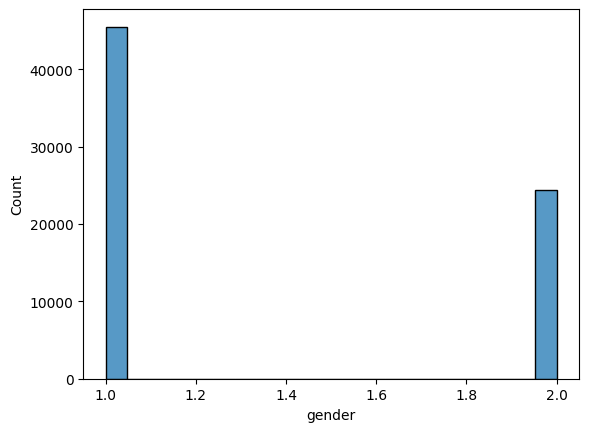

In [117]:
sns.histplot(df['gender'])

In [127]:
sns.scatterplot(df, x='gender', y)

NameError: name 'smoke' is not defined

In [126]:
df['smoke'].value_counts()

smoke
0    63831
1     6169
Name: count, dtype: int64

In [136]:
df[df['smoke'] > 0]['gender'].value_counts()

gender
2    5356
1     813
Name: count, dtype: int64

In [137]:
5356/813

6.587945879458794

In [138]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50.0,2,168,62.0,110,80,1,0
1,1,55.0,1,156,85.0,140,90,3,0
2,2,51.0,1,165,64.0,130,70,3,0
3,3,48.0,2,169,82.0,150,100,1,0
4,4,47.0,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,168,76.0,120,80,1,1
69996,99995,61.0,1,158,126.0,140,90,2,0
69997,99996,52.0,2,183,105.0,180,90,3,0
69998,99998,61.0,1,163,72.0,135,80,1,0


In [148]:
df['height'].sort_values(ascending=False).head(700)

6486     250
21628    207
41901    200
8897     198
30127    198
        ... 
21182    184
59359    184
37162    184
69375    184
2862     184
Name: height, Length: 700, dtype: int64

In [144]:
0.01 *69999

699.99

In [159]:
df.corr()

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
id,1.000000,0.003836,0.003502,-0.003038,-0.001830,0.003356,-0.002529,0.006106,-0.003699
age,0.003836,1.000000,-0.022762,-0.081373,0.053567,0.020932,0.017553,0.153998,-0.047479
gender,0.003502,-0.022762,1.000000,0.499033,0.155406,0.006005,0.015254,-0.035821,0.338135
height,-0.003038,-0.081373,0.499033,1.000000,0.290968,0.005488,0.006150,-0.050226,0.187989
weight,-0.001830,0.053567,0.155406,0.290968,1.000000,0.030702,0.043710,0.141768,0.067780
ap_hi,0.003356,0.020932,0.006005,0.005488,0.030702,1.000000,0.016086,0.023778,-0.000922
ap_lo,-0.002529,0.017553,0.015254,0.006150,0.043710,0.016086,1.000000,0.024019,0.005186
cholesterol,0.006106,0.153998,-0.035821,-0.050226,0.141768,0.023778,0.024019,1.000000,0.010354
smoke,-0.003699,-0.047479,0.338135,0.187989,0.067780,-0.000922,0.005186,0.010354,1.000000


<Axes: >

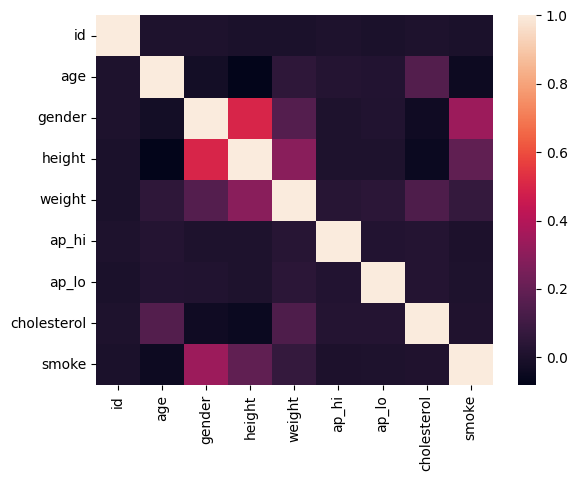

In [151]:
sns.heatmap(df.corr())

In [170]:
mean_height = df['height'].mean()

In [166]:
df[df['height']> 164]['height'].std()

4.980473144139627

In [168]:
std_dev_height = df['height'].std()

In [171]:
lower_cutoff = mean_height - 2 * std_dev_height

In [172]:
upper_cutoff = mean_height + 2 * std_dev_height

In [173]:
outliers_df = df[(df['height'] < lower_cutoff) | (df['height'] > upper_cutoff)]

In [174]:
percentage_outliers = (len(outliers_df) / len(df)) * 100

In [175]:
percentage_outliers

3.3357142857142854

In [176]:
df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke
0,0,50.0,2,168,62.0,110,80,1,0
1,1,55.0,1,156,85.0,140,90,3,0
2,2,51.0,1,165,64.0,130,70,3,0
3,3,48.0,2,169,82.0,150,100,1,0
4,4,47.0,1,156,56.0,100,60,1,0
...,...,...,...,...,...,...,...,...,...
69995,99993,52.0,2,168,76.0,120,80,1,1
69996,99995,61.0,1,158,126.0,140,90,2,0
69997,99996,52.0,2,183,105.0,180,90,3,0
69998,99998,61.0,1,163,72.0,135,80,1,0


In [233]:
df2 = pd.read_csv('cardio_alco.csv')

In [234]:
df2

,id;alco
0,44;0
1,45;0
2,46;0
3,47;0
4,49;0
...,...
56898,99949;0
56899,99950;0
56900,99951;0
56901,99952;0


In [235]:
df2[['id', 'id;alco']] = df2['id;alco'].str.split(';', expand=True)

In [236]:
df2.columns = ['alco', 'id']

In [237]:
df2

,alco,id
0,0,44
1,0,45
2,0,46
3,0,47
4,0,49
...,...,...
56898,0,99949
56899,0,99950
56900,0,99951
56901,0,99952


In [244]:
df2[['alco','id']]= pd.to_numeric(df2[['alco','id']])

TypeError: arg must be a list, tuple, 1-d array, or Series

In [206]:
df2

,alco,id
0,0,0
1,0,1
2,0,2
3,0,3
4,0,4
...,...,...
56898,0,81221
56899,0,81224
56900,0,81225
56901,0,81226


In [207]:
merged_df = pd.merge(df, df2, on='id', how='inner')

In [208]:
merged_df

,id,age,gender,height,weight,ap_hi,ap_lo,cholesterol,smoke,alco
0,0,50.0,2,168,62.0,110,80,1,0,0
1,1,55.0,1,156,85.0,140,90,3,0,0
2,2,51.0,1,165,64.0,130,70,3,0,0
3,3,48.0,2,169,82.0,150,100,1,0,0
4,4,47.0,1,156,56.0,100,60,1,0,0
...,...,...,...,...,...,...,...,...,...,...
56898,81221,51.0,1,168,66.0,110,80,1,0,0
56899,81224,61.0,1,170,70.0,120,80,1,0,0
56900,81225,56.0,1,165,59.0,120,89,1,0,0
56901,81226,40.0,2,152,54.0,120,80,1,0,0


In [255]:
over_50['alco'].unique()

array([0, 1], dtype=int64)

In [256]:
over_50 = merged_df[merged_df['age'] > 50]

In [257]:
len(over_50[over_50['alco'] == 1]) / len(over_50) * 100

5.418023887079261

In [245]:
over_50['alco'] = pd.to_numeric(df2['alco'])

C:\Users\Duke\AppData\Local\Temp\ipykernel_9492\3526365767.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  over_50['alco'] = pd.to_numeric(df2['alco'])


In [254]:
merged_df['alco'] = pd.to_numeric(df2['alco'])

In [264]:
sns.histplot(data=over_50['age'],x='alco')

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [267]:
over_50['alco'].value_counts()

alco
0    34844
1     1996
Name: count, dtype: int64

In [271]:
1996/(56992)

0.03502245929253228

In [272]:
sns.pairplot(merged_df)

Exception ignored in: <function _xla_gc_callback at 0x000001F86F1B2DE0>
Traceback (most recent call last):
  File "C:\Users\Duke\AppData\Local\Programs\Python\Python311\Lib\site-packages\jax\_src\lib\__init__.py", line 98, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 
Exception ignored in: <function _xla_gc_callback at 0x000001F86F1B2DE0>
Traceback (most recent call last):
  File "C:\Users\Duke\AppData\Local\Programs\Python\Python311\Lib\site-packages\jax\_src\lib\__init__.py", line 98, in _xla_gc_callback
    xla_client._xla.collect_garbage()
KeyboardInterrupt: 
Exception ignored in: <function TransformNode.set_children.<locals>.<lambda> at 0x000001F823209760>
Traceback (most recent call last):
  File "C:\Users\Duke\AppData\Local\Programs\Python\Python311\Lib\site-packages\matplotlib\transforms.py", line 198, in <lambda>
    self, lambda _, pop=child._parents.pop, k=id_self: pop(k))

KeyboardInterrupt: 


KeyboardInterrupt: 

Error in callback <function _draw_all_if_interactive at 0x000001F87519E160> (for post_execute):


KeyboardInterrupt: 

Error in callback <function flush_figures at 0x000001F87BEEB240> (for post_execute):



KeyboardInterrupt



In [282]:
df[df['smoke']>0]['weight'].mean()

77.34435078618901

In [281]:
df[df['smoke'] == 0]['weight'].mean()

73.90235152198775

In [286]:
print(df[df['smoke']>0]['ap_hi'].mean())
df[df['smoke'] == 0]['ap_hi'].mean()

128.36051223861242


128.86143096614498

In [287]:
print(df[df['smoke']>0]['cholesterol'].mean())
df[df['smoke'] == 0]['cholesterol'].mean()

1.3895282865942615


1.3646817377136502

In [289]:
print(df[df['gender']>0]['ap_hi'].mean())
df[df['gender'] == 0]['ap_hi'].mean()

128.8172857142857


nan

In [321]:
df3 = pd.read_csv('covid_data.csv')

In [291]:
df3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5
...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN


In [308]:
df3[df3['date'] == '2020-03-16'][df3['location']=='Germany']

C:\Users\Duke\AppData\Local\Temp\ipykernel_9492\1032020983.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['date'] == '2020-03-16'][df3['location']=='Germany']


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
7990,Germany,2020-03-16,1043,4,83783945.0,21.453,45229.245,8.0


In [307]:
df3[df3['date'] == '2020-03-16'][df3['location']=='Italy']

C:\Users\Duke\AppData\Local\Temp\ipykernel_9492\3465894772.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  df3[df3['date'] == '2020-03-16'][df3['location']=='Italy']


,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand
10764,Italy,2020-03-16,2823,370,60461828.0,23.021,35220.084,3.18


In [309]:
df3['new_cases']

0        0
1        0
2        0
3        0
4        0
        ..
23077    0
23078    0
23079    0
23080    0
23081   -9
Name: new_cases, Length: 23082, dtype: int64

In [310]:
sum(df3['new_cases'])

14420924

In [316]:
df3[df3['date'] >= '2020-02-28' & df3['date'] <= '2020-03-20']

TypeError: Cannot perform 'rand_' with a dtyped [object] array and scalar of type [bool]

In [325]:
df3['death_rate'] = df3['new_deaths']/1000000

In [318]:
df3

,location,date,new_cases,new_deaths,population,aged_65_older_percent,gdp_per_capita,hospital_beds_per_thousand,death_rate
0,Afghanistan,2019-12-31,0,0,38928341.0,2.581,1803.987,0.5,0.000000
1,Afghanistan,2020-01-01,0,0,38928341.0,2.581,1803.987,0.5,0.000000
2,Afghanistan,2020-01-02,0,0,38928341.0,2.581,1803.987,0.5,0.000000
3,Afghanistan,2020-01-03,0,0,38928341.0,2.581,1803.987,0.5,0.000000
4,Afghanistan,2020-01-04,0,0,38928341.0,2.581,1803.987,0.5,0.000000
...,...,...,...,...,...,...,...,...,...
23077,International,2020-02-28,0,0,NaN,NaN,NaN,NaN,0.000000
23078,International,2020-02-29,0,2,NaN,NaN,NaN,NaN,0.000002
23079,International,2020-03-01,0,0,NaN,NaN,NaN,NaN,0.000000
23080,International,2020-03-02,0,0,NaN,NaN,NaN,NaN,0.000000


In [326]:
df3[df3['death_rate']].sort_values(ascending=False)

KeyError: "None of [Index([  0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,   0.0,\n       ...\n         0.0, 1e-06,   0.0, 1e-06,   0.0,   0.0, 2e-06,   0.0,   0.0, 1e-06],\n      dtype='float64', length=23082)] are in the [columns]"

In [339]:
no = df3[df3['hospital_beds_per_thousand'] >= 5]['gdp_per_capita'] > 10000

In [343]:
no.value_counts()

gdp_per_capita
True     2997
False     502
Name: count, dtype: int64

In [345]:
2997/(2997 + 502)

0.8565304372677908